# Multiple Inputs

In [13]:
%pip install langgraph
%pip install IPython

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [15]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [16]:
def process_values(state: AgentState) -> AgentState:
    """This function process handles multiple different inputs"""
    print(state)

    state['result'] = f"Hi there { state['name'] }! Your sum = { sum(state['values']) }"

    print(state)
    return state

In [17]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

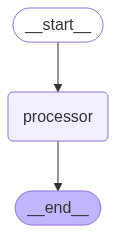

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
ans = app.invoke({ "values": [1, 2, 3, 4], "name": "Steve" })

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


In [20]:
print(ans["result"])

Hi there Steve! Your sum = 10
